# Banking Customer Churn Prediction

       In this Project we will Predict Whether a Customer will leave the Bank or not Based on Many Factors.

   Following factors are:
      1)CreditScore
      2)Geography
      3)Gender
      4)Age
      5)Tenure
      6)Balance
      7)NumOfProducts
      8)HasCrCard
      9)IsActiveMember
      10).EstimatedSalary
      

In [1]:
#import necessary libraries

import pandas as pd 
import numpy as np  #numerical python
import matplotlib.pyplot as plt #plot the graph
import seaborn as sns #plot graphical
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [2]:
#read the dataset

data = pd.read_csv('Churn_Modelling.csv')

In [3]:
#to display the first five columns of the dataset

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#to display the last five columns of the dataset

data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Aim : To predict whether the Customer is Churn the bank or Not.

In [5]:
#to display how many rows and columns in the dataset

data.shape 

(10000, 14)

In [6]:
#in printing statement

print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 10000
Number of columns 14


In [7]:
# to display the information of the dataset

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#printing the count of 'Exited' people

print(data.Exited.value_counts()) 

0    7963
1    2037
Name: Exited, dtype: int64


# Data Preprocessing

1) Handling missing values
2) Handlig categorical values
3) Handling imbalance data

# 1) Handling Missing values

In [9]:
#to check the null values

data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#to check the null values in count

data.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Drop irrelavent data

In [11]:
#to display the index

data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
#dropping irrelvent columns

data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2) Encoding Categorical values

    To convert the categorical values into integer encoding or binary encoding.

In [14]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data = pd.get_dummies(data,drop_first=True)

In [16]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
#to check how many customer will be Exited

data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
#independent Variables

x = data.drop('Exited',axis=1)

In [19]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
#dependent Variables

y = data['Exited']

In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# 3)Handling imbalanced data with SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
xres,yres = SMOTE().fit_resample(x,y)

In [24]:
xres.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    1                  0                1              1
689          39   4       89609.273937   2              1          0               178962.692821    0                  0                0              1
             31   3       139799.630000  1              0          1               120663.570000    0                  1                0              1
                  4       0.000000       2              1          1               136610.020000    0                  1                0              1
             33   2       161814.640000  2              1          0               169381.900000    1                  0                1              1
                                                                                       

In [25]:
yres.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Milestone 3: EDA (exploratory data analysis)

        1)Descriptive Statistical
        2)Visual Analysis

# 1)Descriptive Statistical

In [26]:
#to see Descriptive Statistical about the data

data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


# 2) Visual Analysis
      1. Univariate analysis
      2. Bivariate analysis
      3. Multivariate analysis

<Axes: ylabel='count'>

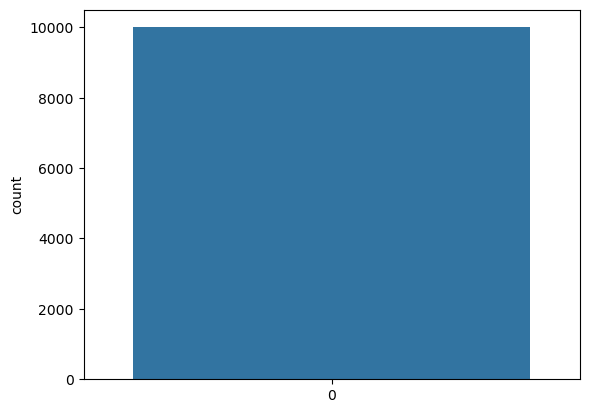

In [27]:
#visualize the count of Exited people (univariate analysis)

sns.countplot(data['Exited'])

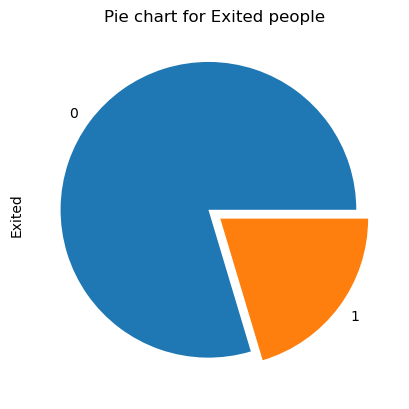

In [28]:
#to get the pie Chart to analyze the Exited people

data['Exited'].value_counts().plot.pie(explode=[0.05,0.05])
plt.title('Pie chart for Exited people')
plt.show()

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

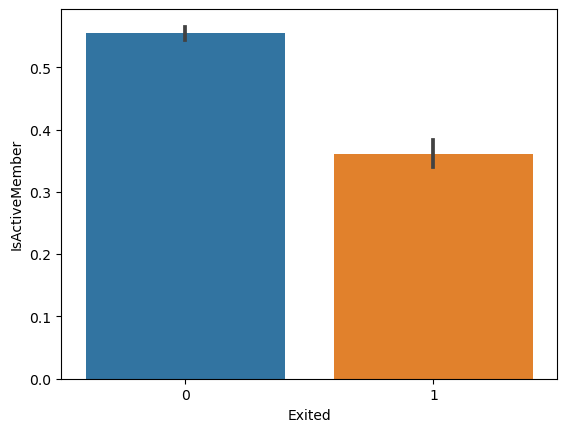

In [29]:
#bivariate analysis barplot

sns.barplot(x = "Exited", y = "IsActiveMember" ,data=data)

<Axes: >

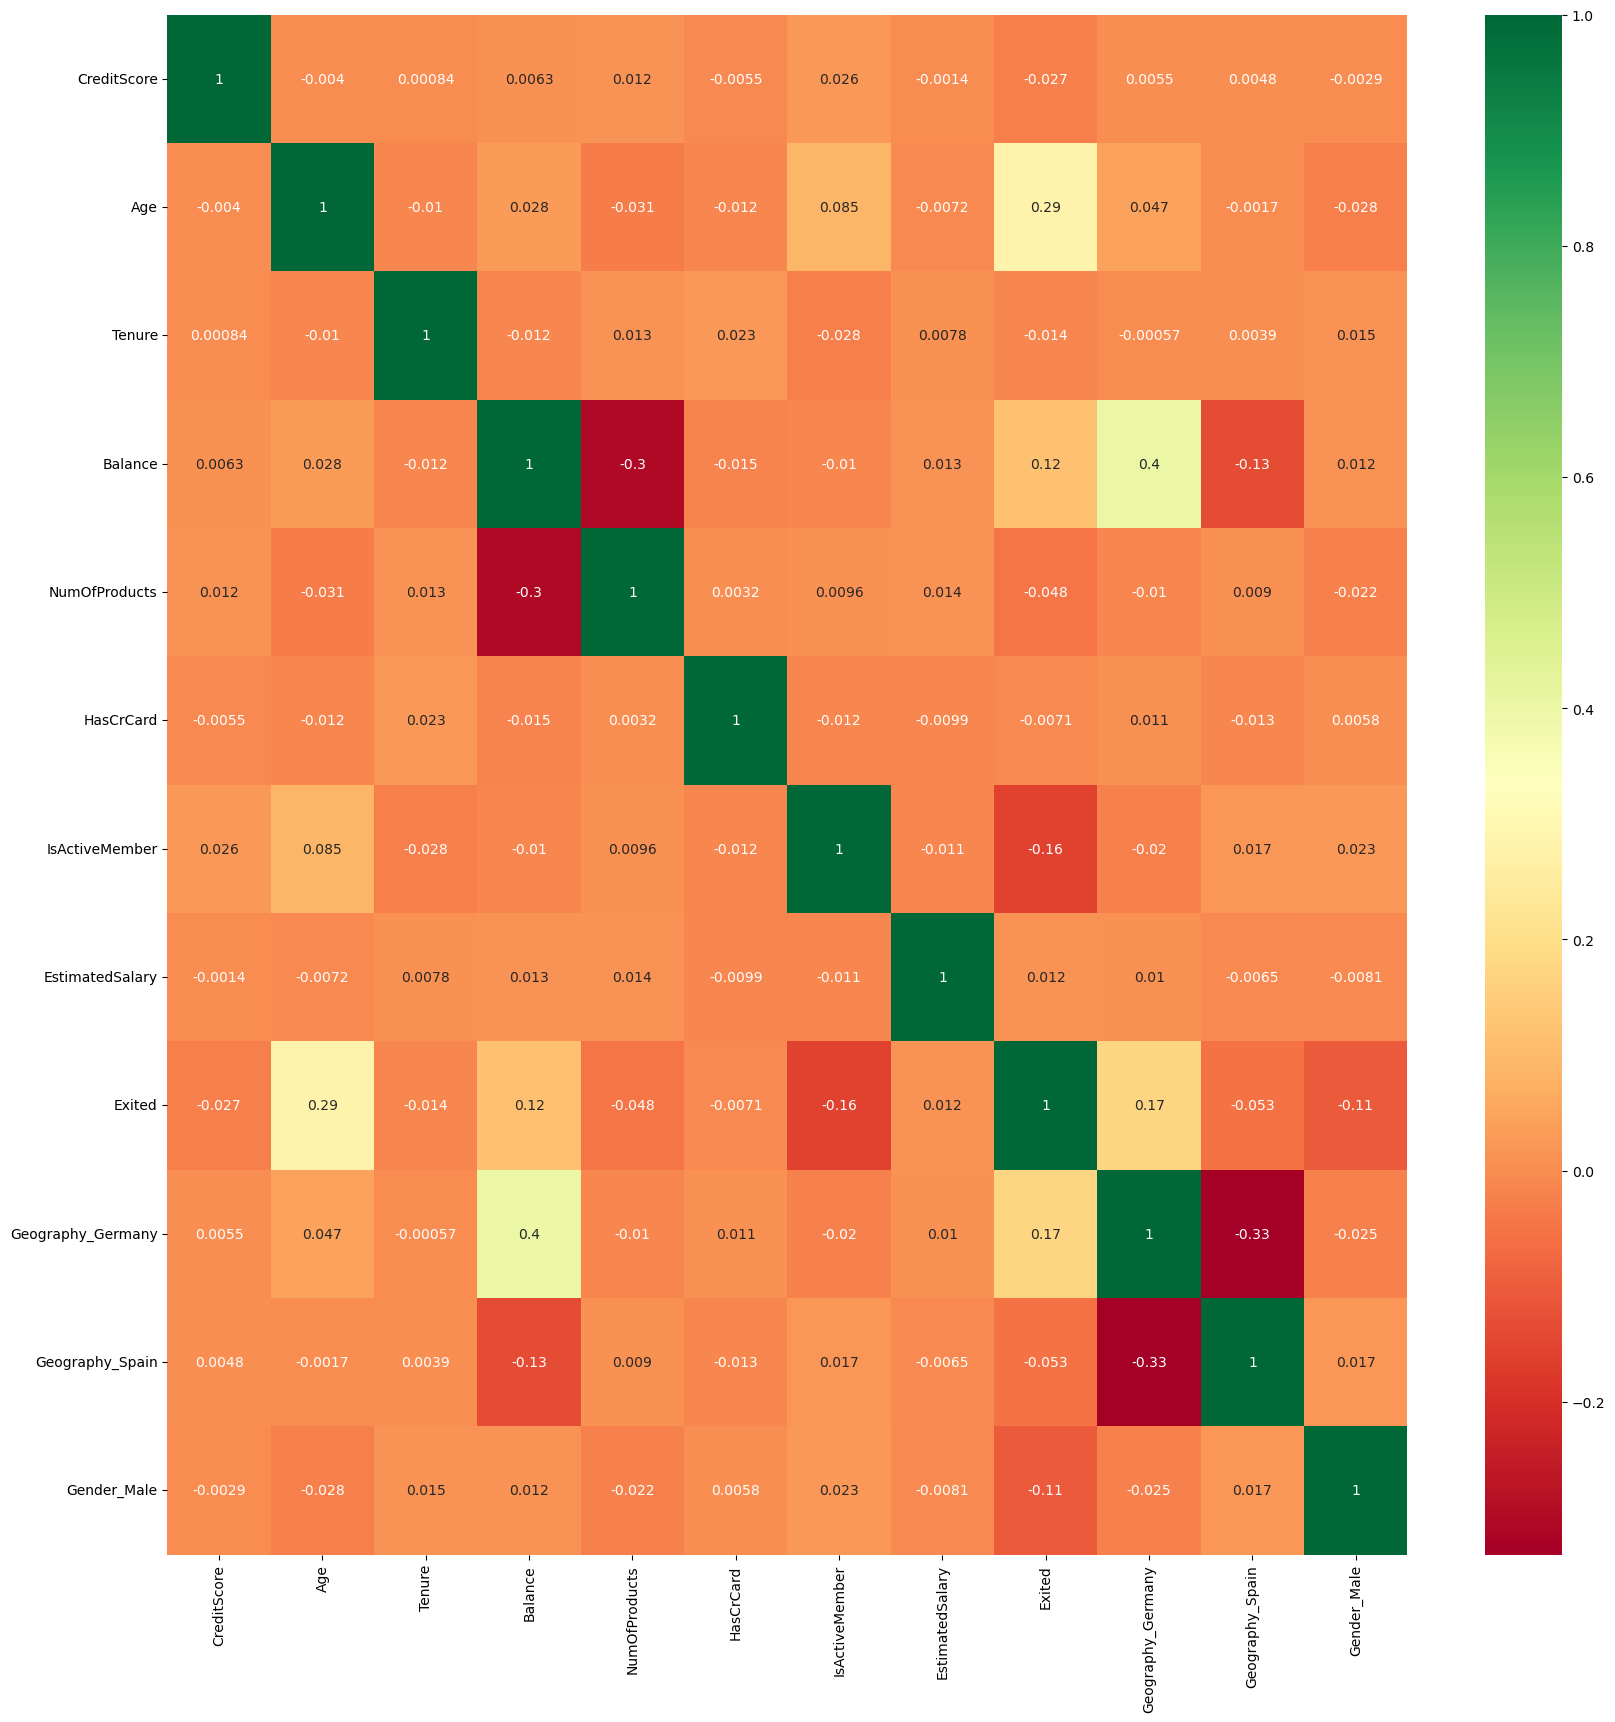

In [35]:
#Multivariate analysis Heatmap

corrmat =data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

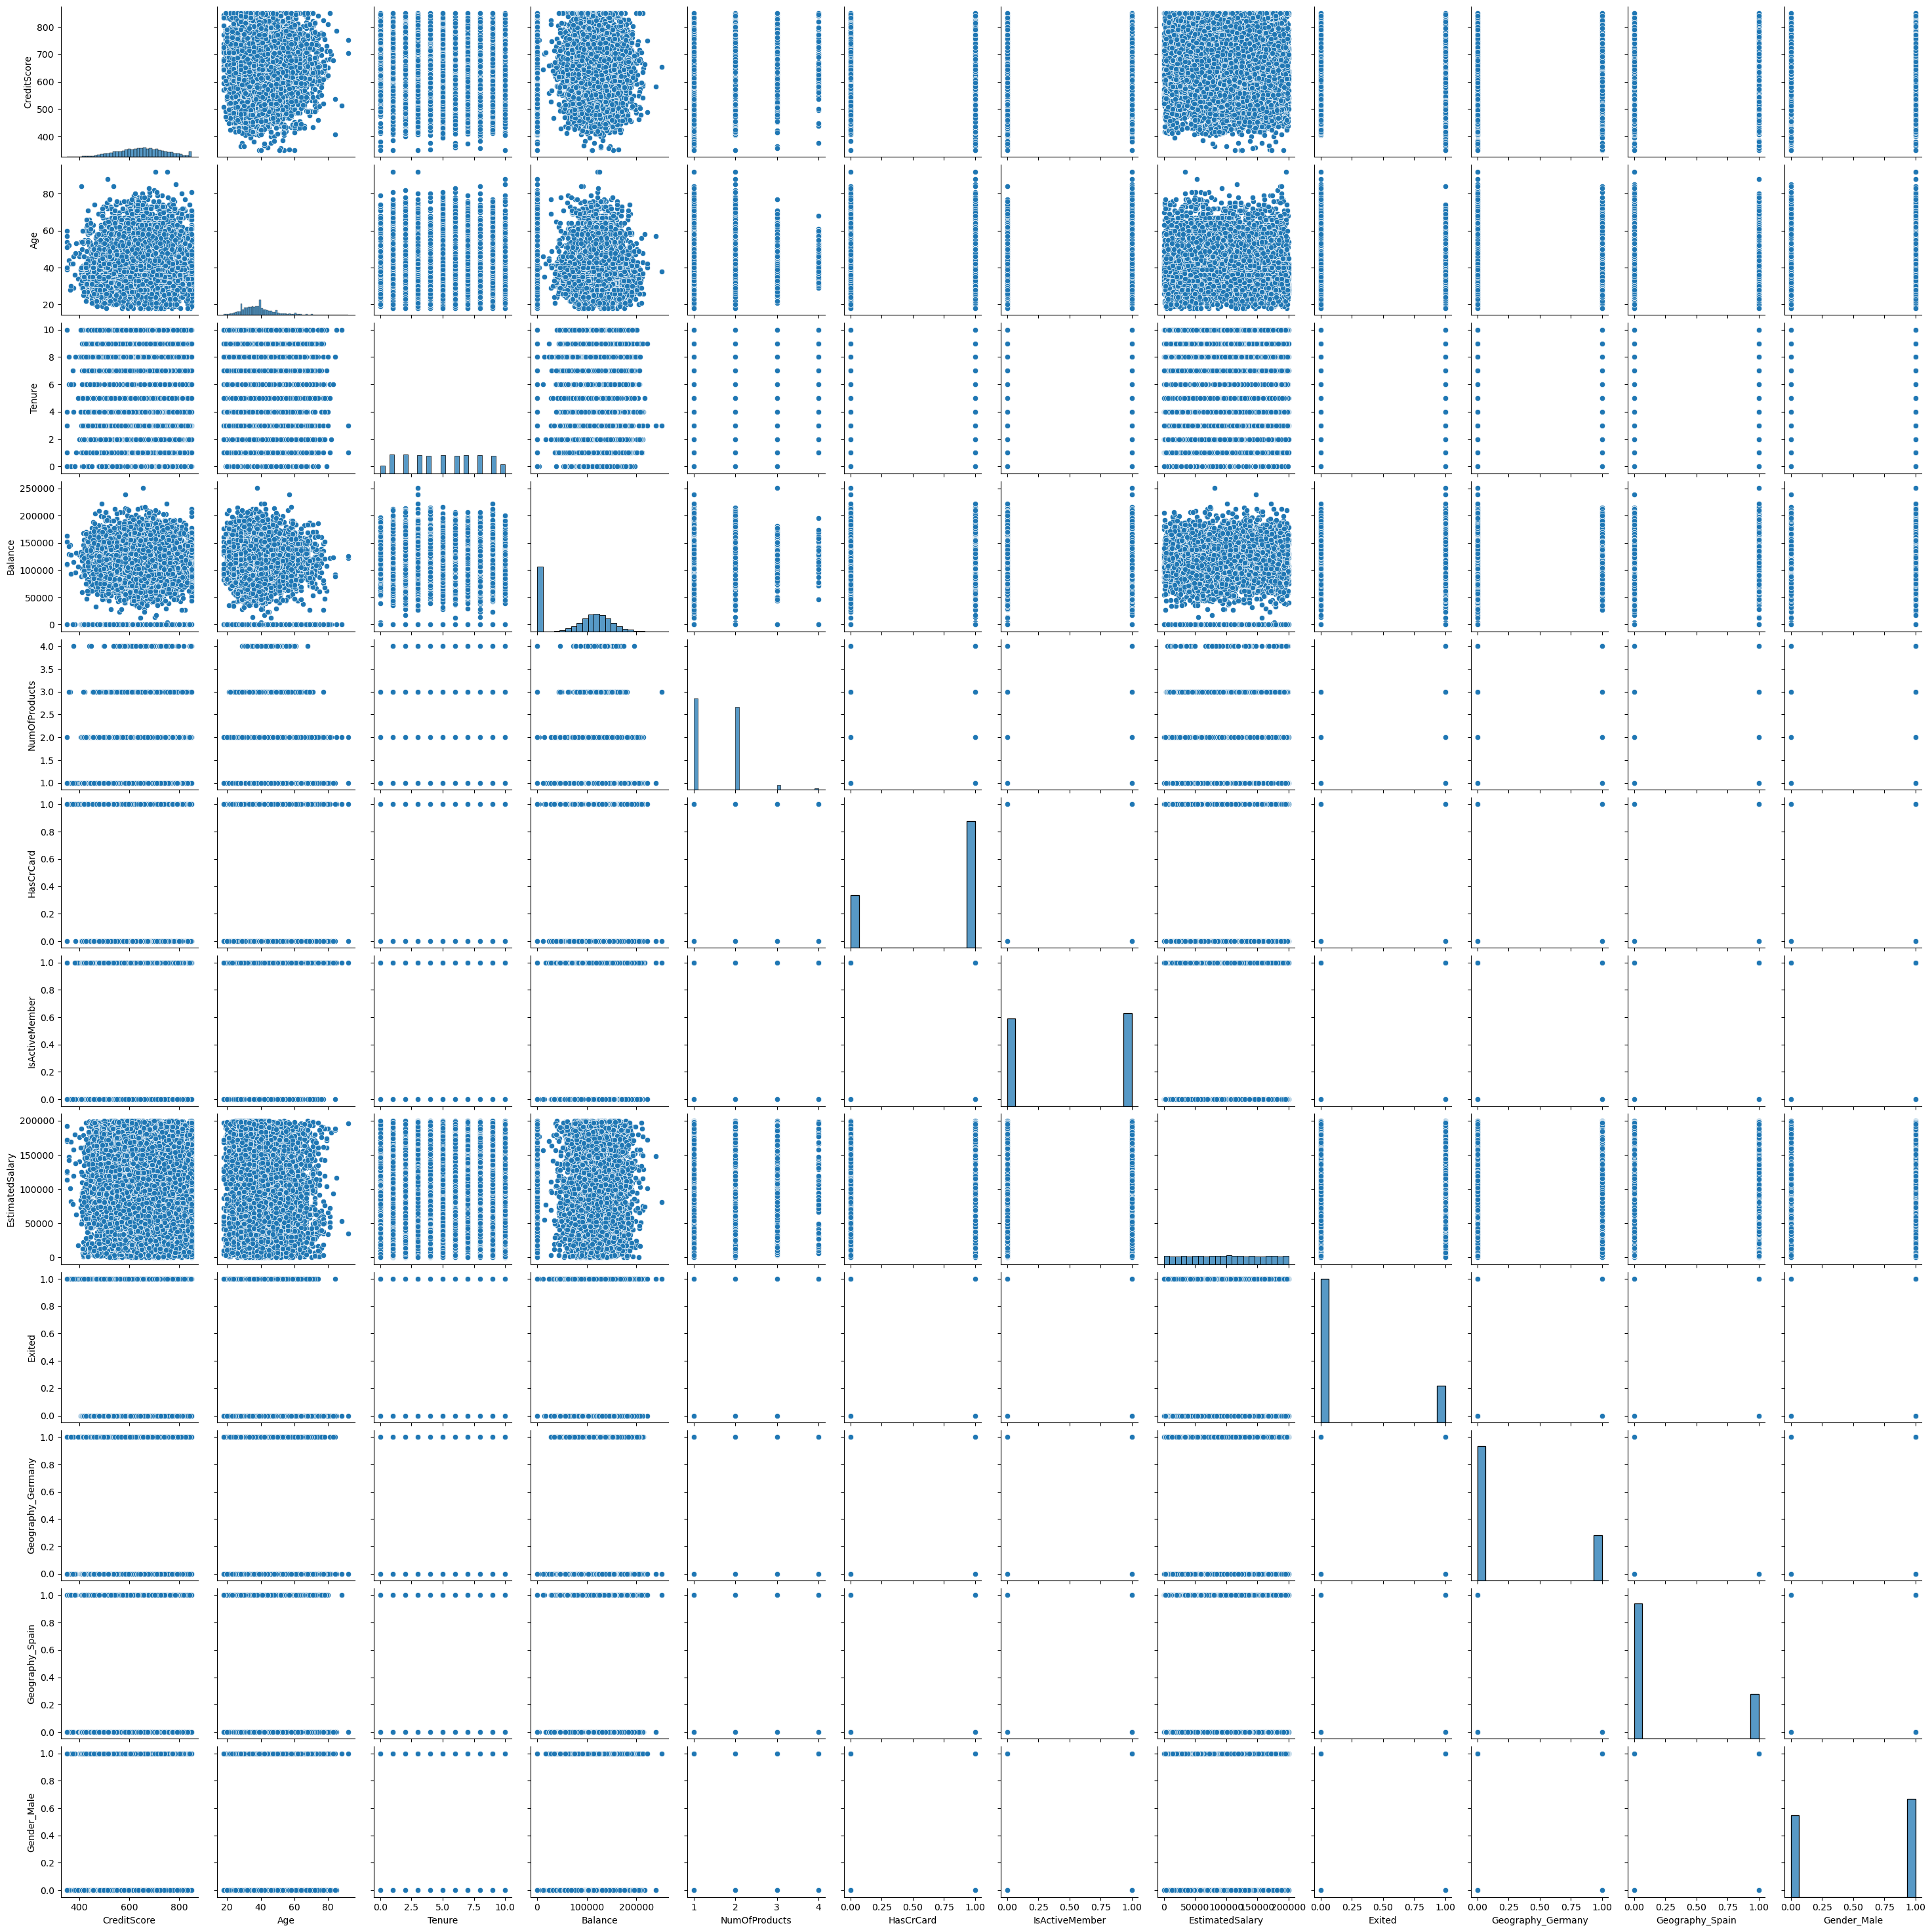

In [31]:
#Multivariate analysis pairplot

sns.pairplot(data)

# Splitting the data into Train and Test

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(xres,yres,test_size=0.2,random_state=42)

# Scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)               

In [40]:
xtrain

array([[-0.82176808,  1.09518229, -0.66485105, ..., -0.57336224,
        -0.46225545,  1.17377719],
       [ 1.10107938,  0.09910713, -1.40065458, ..., -0.57336224,
        -0.46225545,  1.17377719],
       [-0.90917024,  0.29832216, -0.29694928, ..., -0.57336224,
        -0.46225545,  1.17377719],
       ...,
       [ 0.20520726,  0.19871465,  1.17465778, ..., -0.57336224,
        -0.46225545,  1.17377719],
       [ 0.06317876,  0.59714471, -1.03275282, ...,  1.7440981 ,
        -0.46225545, -0.85195045],
       [ 0.53296536,  0.99557478, -1.40065458, ...,  1.7440981 ,
        -0.46225545,  1.17377719]])

# Milestone 4: Model Building

     In model building, We training the model in Mltiple Algorithms.
            1)Logistic regression model
            2)Decision tree model
            3)Random forest model
            4)KNN (K-Nearest neighbors)
            5)SVM (support vector Model)

# 1)Logistic Regression model

In [41]:
log = LogisticRegression()

In [42]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [43]:
ypred1 = log.predict(xtest)

In [44]:
accuracy_score(ytest,ypred1)

0.7853107344632768

In [45]:
from sklearn.metrics import precision_score,recall_score

In [46]:
precision_score(ytest,ypred1)

0.7724137931034483

In [47]:
recall_score(ytest,ypred1)

0.7933032839665164

In [48]:
f1_score(ytest,ypred1)

0.7827191867852604

# 2)Decision tree model

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [52]:
ypred2 = dt.predict(xtest)

In [53]:
accuracy_score(ytest,ypred2)

0.7799748901443817

# 3) Random Forest model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier()

In [56]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [57]:
ypred3 = rf.predict(xtest)

# 4) KNN (K-Nearest neighbors)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()

In [60]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [61]:
ypred4 = knn.predict(xtest)

In [62]:
accuracy_score(ytest,ypred4)

0.8179535467671061

In [63]:
precision_score(ytest,ypred4)

0.7968273337400854

# 5) SVM (support vector Model)

In [64]:
from sklearn import svm

In [65]:
svm = svm.SVC()

In [66]:
svm.fit(xtrain,ytrain)

SVC()

In [67]:
ypred5 = svm.predict(xtest)

In [68]:
accuracy_score(ytest,ypred5)

0.8433772755806654

In [69]:
precision_score(ytest,ypred5)

0.8382541720154044

In [70]:
recall_score(ytest,ypred5)

0.840952994204765

In [71]:
f1_score(ytest,ypred5)

0.8396014143362263

In [72]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','KNN','SVM'],'ACC':[accuracy_score(ytest,ypred1),accuracy_score(ytest,ypred2),accuracy_score(ytest,ypred3),accuracy_score(ytest,ypred4),accuracy_score(ytest,ypred5)]})

In [73]:
final_data

,Models,ACC
0,LR,0.785311
1,DT,0.779975
2,RF,0.865976
3,KNN,0.817954
4,SVM,0.843377


In the final data the RF(Random Forest) model accuracy score is high. So, we can use the RF in Model deployment.

# Milestone 6:Model Deployment
     
         1)Save the model.

In [74]:
xres = sc.fit_transform(xres)

In [75]:
rf.fit(xres,yres)

RandomForestClassifier()

In [76]:
import pickle

In [79]:
#save the model

pickle.dump(rf,open('bank_customer_churn_predict_model.pkl','wb'))